In [331]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [332]:
import numpy as np
import pandas as pd

In [333]:
import datetime as dt

In [334]:
import scipy.stats as sts

# Reflect Tables into SQLAlchemy ORM

In [335]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [336]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [337]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [338]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [339]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [340]:
# Create our session (link) from Python to the DB
session = Session(engine)

#inspect column names & types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [341]:
#view the data in a dataframe

#query the db so it can be put into a df
measurement_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

#view the data in the df
measurement_df = pd.DataFrame(measurement_data, columns = ['id','station', 'date', 'prcp', 'tobs'])
measurement_df.set_index('id', inplace = True)
measurement_df = measurement_df.sort_values(by = 'date', ascending=False)
measurement_df.head()

,station,date,prcp,tobs
id,,,,
19550,USC00516128,2017-08-23,0.45,76.0
12187,USC00519523,2017-08-23,0.08,82.0
2724,USC00519397,2017-08-23,0.00,81.0
7635,USC00514830,2017-08-23,0.00,82.0
12186,USC00519523,2017-08-22,0.00,82.0


# Exploratory Climate Analysis

In [342]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the databas e

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [343]:
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [344]:
#how many records are there?
session.query(func.count(Measurement.date)).all()

[(19550)]

In [345]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
raindata = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

for rain in raindata:
    print(rain.date)

1
2017-06-10
2017-06-10
2017-06-10
2017-06-10
2017-06-10
2017-06-10
2017-06-09
2017-06-09
2017-06-09
2017-06-09
2017-06-09
2017-06-09
2017-06-08
2017-06-08
2017-06-08
2017-06-08
2017-06-08
2017-06-08
2017-06-08
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-06
2017-06-06
2017-06-06
2017-06-06
2017-06-06
2017-06-06
2017-06-06
2017-06-05
2017-06-05
2017-06-05
2017-06-05
2017-06-05
2017-06-05
2017-06-05
2017-06-04
2017-06-04
2017-06-04
2017-06-04
2017-06-04
2017-06-04
2017-06-03
2017-06-03
2017-06-03
2017-06-03
2017-06-03
2017-06-03
2017-06-02
2017-06-02
2017-06-02
2017-06-02
2017-06-02
2017-06-02
2017-06-01
2017-06-01
2017-06-01
2017-06-01
2017-06-01
2017-06-01
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-30
2017-05-29
2017-05-29
2017-05-29
2017-05-29
2017-05-29
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-27
2017-05-27
2017-05-27
2017-05-27
2017-05-

In [346]:
#turn rain query into a dataframe so it can be plotted
raindata_df = pd.DataFrame(raindata, columns = ['id','station', 'date', 'prcp', 'tobs'])

raindata_plot = raindata_df[['date', 'prcp']]
raindata_df.set_index('id', inplace=True, )

raindata_plot.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


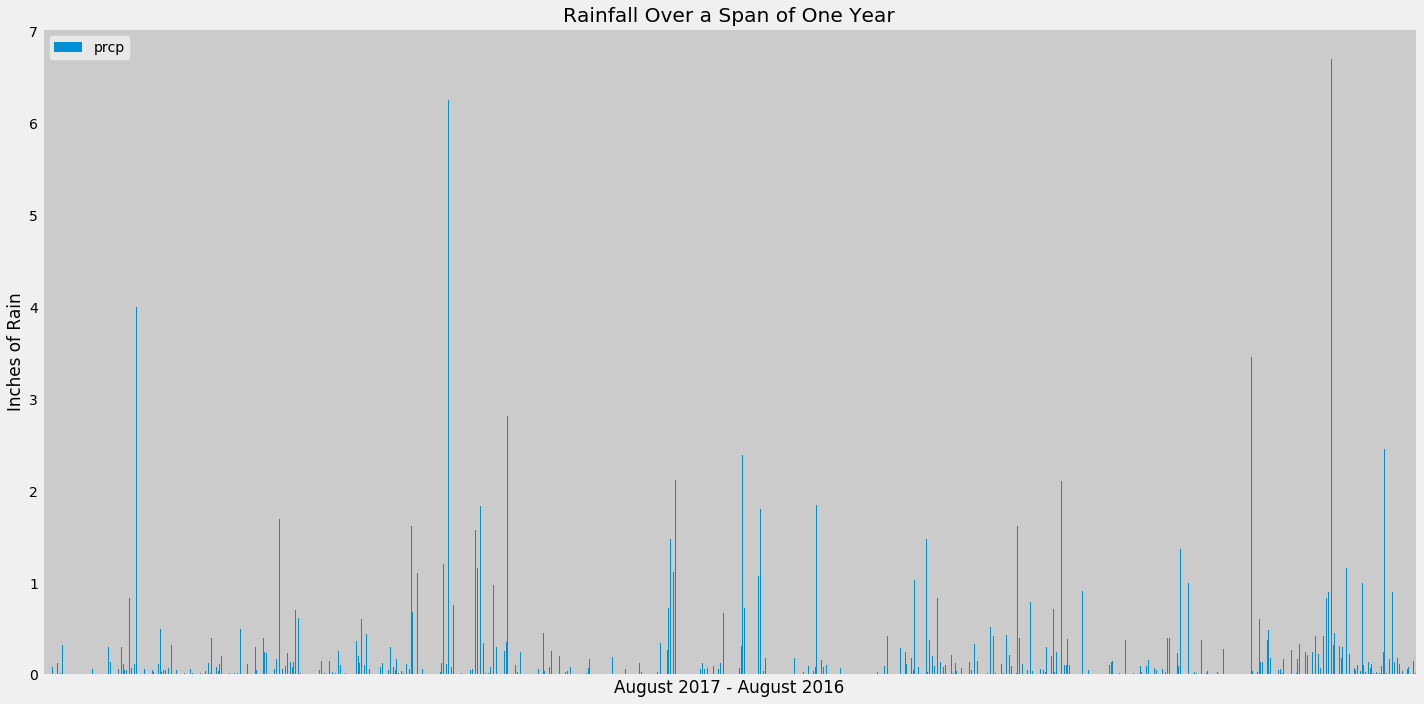

In [347]:
#plot the results in a bar graph
raindata_plot.plot(kind="bar", title="Rainfall Over a Span of One Year", figsize = (20, 10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel("August 2017 - August 2016")
plt.ylabel("Inches of Rain")
plt.tight_layout()
plt.show()


![precipitation](Images/precipitation.png)

In [348]:
# Use Pandas to calculate the summary statistics for the precipitation data
raindata_plot.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [349]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()


9

In [350]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [351]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(most_active)


[(54.0, 85.0, 71.66378066378067)]


In [390]:
#Drop NaN values & count who has the most temp data
measurement_df_dropna = measurement_df[['station','tobs']].dropna().groupby(measurement_df['station'])

measurement_df_dropna.describe()

tobs                                                   
              count       mean       std   min   25%   50%   75%   max
station                                                               
USC00511918  1979.0  71.615968  5.476309  53.0  68.0  72.0  75.0  87.0
USC00513117  2709.0  72.689184  3.624668  59.0  70.0  73.0  75.0  85.0
USC00514830  2202.0  74.873297  3.812367  58.0  72.0  75.0  78.0  85.0
USC00516128  2612.0  70.915008  3.523904  58.0  69.0  71.0  73.0  84.0
USC00517948  1372.0  74.684402  4.383041  58.0  72.0  75.0  78.0  87.0
USC00518838   511.0  72.724070  4.144946  58.0  70.0  73.0  76.0  83.0
USC00519281  2772.0  71.663781  4.357642  54.0  69.0  72.0  74.0  85.0
USC00519397  2724.0  74.553231  4.629627  56.0  72.0  76.0  78.0  87.0
USC00519523  2669.0  74.543649  4.323161  56.0  72.0  75.0  77.0  85.0

In [391]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempdata = session.query(Measurement.id, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).all()



In [392]:
#create df with tempdata
tempdata_df = pd.DataFrame(tempdata, columns = ['id','station', 'tobs'])
tempdata_df.set_index('id', inplace=True)

tempdata_plot = tempdata_df[['tobs']]
tempdata_df.head()

,station,tobs
id,,
14959,USC00519281,79.0
14958,USC00519281,76.0
14957,USC00519281,76.0
14956,USC00519281,77.0
14955,USC00519281,77.0


([<matplotlib.axis.YTick at 0x1f351649048>,
 <a list of 10 Text yticklabel objects>)

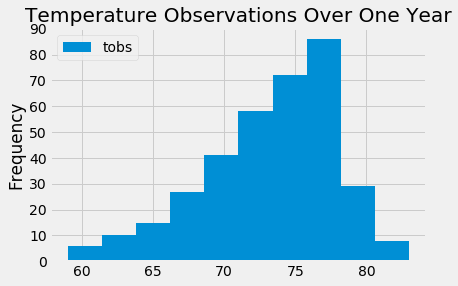

In [405]:
#histogram of results
tempdata_plot.plot(kind='hist', title = 'Temperature Observations Over One Year')

plt.yticks(np.arange(0,100,10))

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
